## Exploratory Data Analysis (EDA)

This notebook focuses on exploring patterns and trends in Tesla’s stock data.
The analysis uses the processed dataset to ensure consistency across all steps.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/processed/tesla_stock_processed.csv")
df.head()


,Date,Open,High,Low,Close,Volume,Adj Close
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


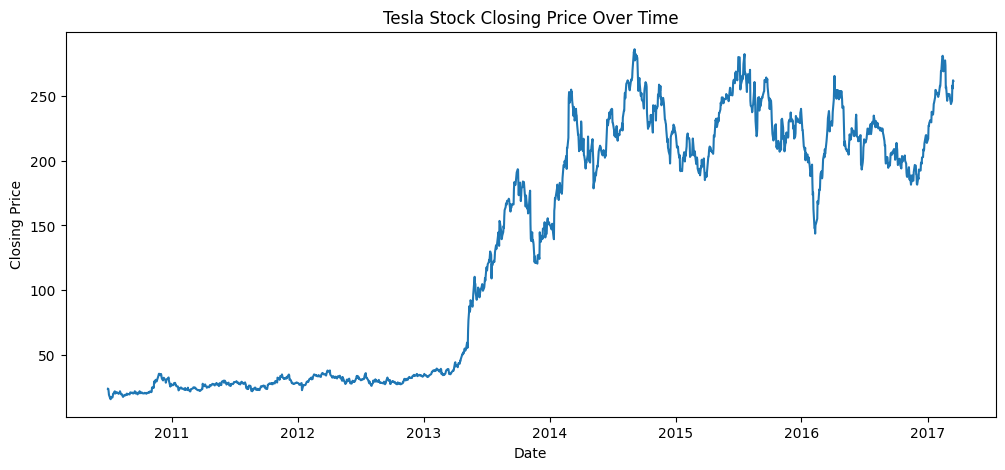

In [8]:
df["Date"]= pd.to_datetime(df["Date"])
plt.figure(figsize=(12,5))
plt.plot(df["Date"], df["Close"])
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Tesla Stock Closing Price Over Time")
plt.show()


### Closing Price  Over Time Trend Analysis

Tesla’s closing price shows a clear long-term upward trend with periods of high volatility.
In the early years, price movement is relatively stable, followed by a sharp growth phase and multiple fluctuations.

This behavior indicates that while Tesla stock has grown significantly over time, it also experiences frequent short-term ups and downs, which is typical for growth-oriented technology stocks.

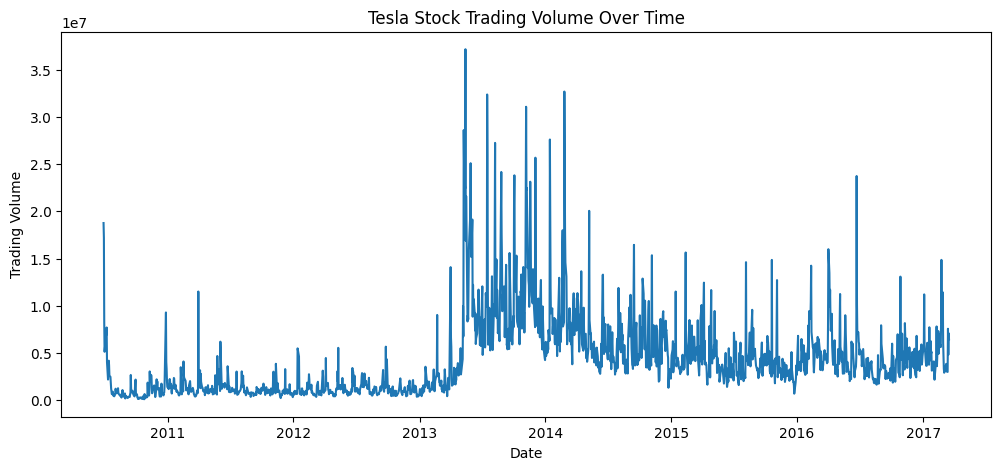

In [9]:
plt.figure(figsize=(12,5))
plt.plot(df["Date"], df["Volume"])
plt.xlabel("Date")
plt.ylabel("Trading Volume")
plt.title("Tesla Stock Trading Volume Over Time")
plt.show()

This plot shows the daily trading volume of Tesla stock across time.

In the early period (2010–2012), trading volume is relatively low and stable, indicating limited market participation and lower investor interest.

During 2013–2014, there is a sharp increase in trading volume with frequent spikes. This suggests heightened market activity, possibly due to major company events, announcements, or increased public attention.

From 2015 onwards, trading volume declines compared to the peak period but remains higher than the early years, indicating sustained but more stable investor interest.

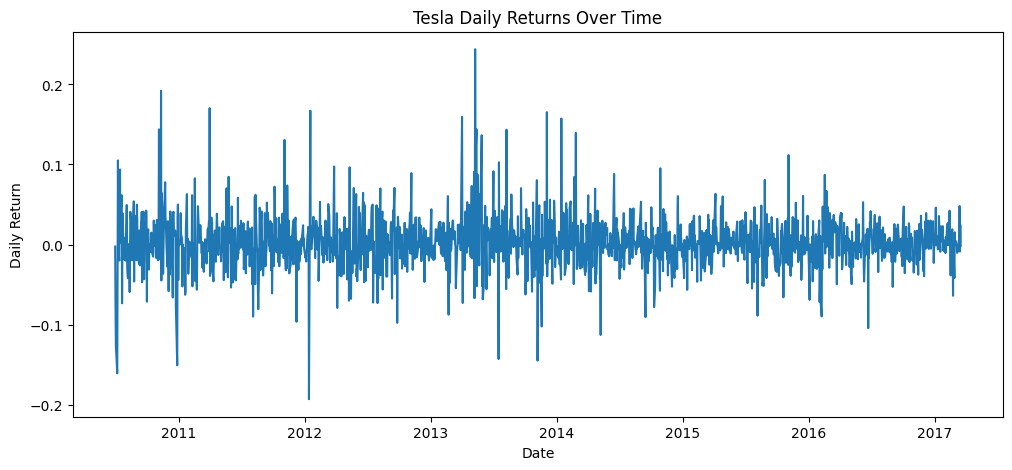

In [10]:
df["Daily_Return"] = df["Close"].pct_change()

plt.figure(figsize=(12,5))
plt.plot(df["Date"], df["Daily_Return"])
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.title("Tesla Daily Returns Over Time")
plt.show()


This graph shows Tesla’s daily stock returns over time. The x-axis represents the date, and the y-axis shows the daily return. Most returns fluctuate around zero, indicating normal day-to-day price changes. However, there are several sharp positive and negative spikes, which suggest periods of high volatility. Overall, the graph shows that Tesla’s stock experiences frequent short-term fluctuations rather than a steady trend.

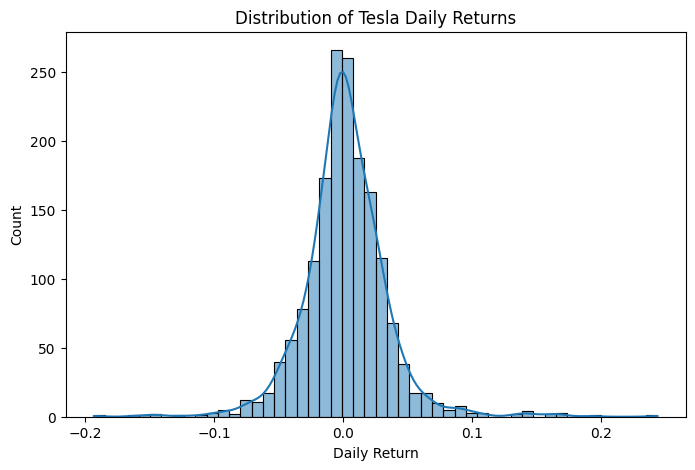

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(df["Daily_Return"].dropna(), bins=50, kde=True)
plt.xlabel("Daily Return")
plt.title("Distribution of Tesla Daily Returns")
plt.show()

* The histogram shows the distribution of Tesla’s daily returns.
* Most values are concentrated around zero, indicating small daily price changes on most trading days.
* However, the presence of long tails on both sides suggests occasional extreme positive and negative returns.
* This non-normal distribution highlights the risky and volatile nature of Tesla stock.

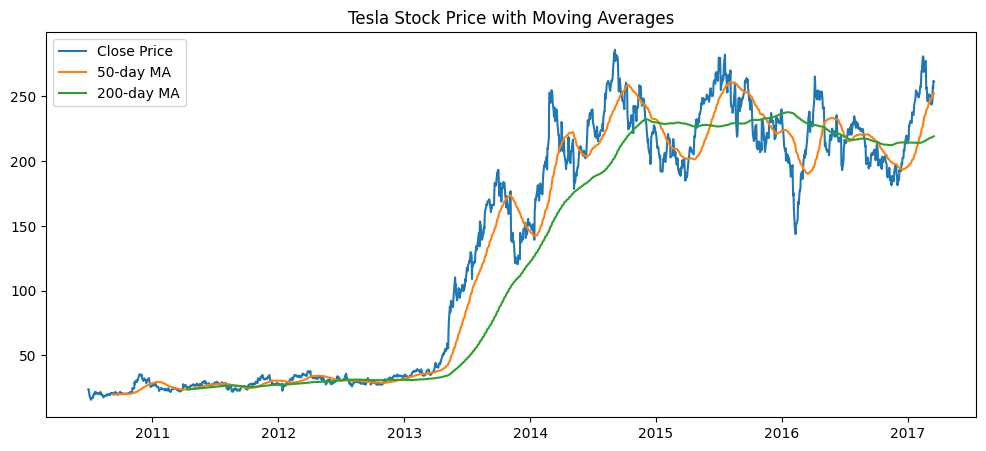

In [14]:
df["MA_50"] = df["Close"].rolling(window=50).mean()
df["MA_200"] = df["Close"].rolling(window=200).mean()

plt.figure(figsize=(12,5))
plt.plot(df["Date"], df["Close"], label="Close Price")
plt.plot(df["Date"], df["MA_50"], label="50-day MA")
plt.plot(df["Date"], df["MA_200"], label="200-day MA")
plt.legend()
plt.title("Tesla Stock Price with Moving Averages")
plt.show()

* The moving average plot smooths short-term fluctuations and highlights the long-term trend of Tesla’s stock price.
* The 50-day moving average reacts faster to recent price changes, while the 200-day moving average represents long-term market sentiment.
* Periods where the short-term moving average stays above the long-term moving average indicate sustained bullish trends.

## conclusion
• Tesla stock shows a strong long-term upward trend with significant short-term volatility.

• Trading volume confirms periods of heightened market participation, particularly during rapid price movements.

• Daily returns fluctuate around zero with heavy tails, indicating elevated risk and non-normal behavior.

• These characteristics suggest that time-series–aware and volatility-sensitive models are more appropriate than simple linear regression.